# 생선 길이로 무게 예측

- 회귀(regression)
    - 임의의 어떤 숫자를 예측하는 문제
    - 변수들 사이의 상관관계를 분석하는 방법

- KNN 회귀
     1. 분류와 똑같이 예측하려는 샘플에 가장 가까운 샘플 K개를 선택
     2. k개의 샘플의 종속변수의 값의 평균을 구함

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor # 회귀쓸꺼임
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error # 평균 절댓값 오차(정확도를 쓸수없어서 대신에 쓰는것임)

# 데이터 준비

In [3]:
df = pd.read_csv("./data/Fish.csv")

In [4]:
df = df.loc[df["Species"] == "Perch", ["Species","Length2","Weight"]]

In [5]:
df.head()

,Species,Length2,Weight
72,Perch,8.4,5.9
73,Perch,13.7,32.0
74,Perch,15.0,40.0
75,Perch,16.2,51.5
76,Perch,17.4,70.0


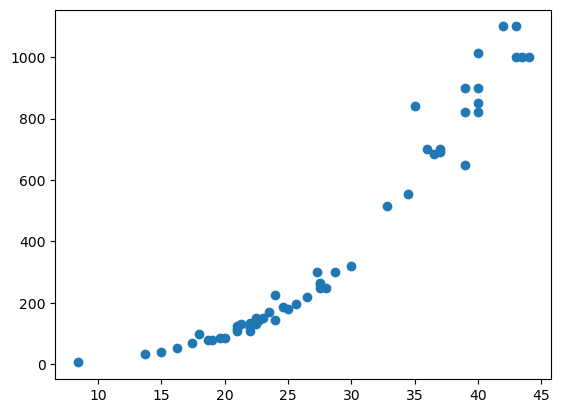

In [8]:
plt.figure()

plt.scatter(df["Length2"], df["Weight"])
plt.show()

- 길이가 커짐에 따라 무게가 증가하는 경향이 있음

In [17]:
# 데이터 분할 75 :25

x_train, x_test, y_train, y_test = train_test_split(df["Length2"], df["Weight"],test_size=0.25, random_state=31)

In [18]:
x_train.values

array([19.6, 39. , 39. , 21. , 22. , 20. , 36.5, 23. , 27.5, 36. , 35. ,
       27.5, 22. , 30. , 32.8, 25. , 40. , 13.7, 27.5, 24. , 37. , 28.7,
       21. , 22.5, 21. , 40. , 42. , 22. , 24. , 39. , 44. , 18.7, 37. ,
       40. , 34.5, 26.5, 25.6, 43.5, 28. , 22. , 23.5, 22. ])

In [19]:
# 독립변수는 2차원 배열을 받아야하는데 1차원 배열이네??
x_train.shape

(42,)

In [20]:
# 독립변수는 2차원 배열이어야함
x_train = np.reshape(x_train.values, (-1, 1))

In [21]:
x_train.shape

(42, 1)

In [24]:
# 테스트 데이터도 잊지마.....

In [22]:
x_test = np.reshape(x_test.values, (-1, 1))

In [23]:
x_test.shape

(14, 1)

# 모델 훈련

In [25]:
knr = KNeighborsRegressor(n_neighbors = 5)

In [26]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

# 모델 평가

mean_absolute_error # 평균 절댓값 오차(정확도를 쓸수없어서 대신에 쓰는것임)

- 결정계수
    - 계산식
        - 1 - ((sum(타깃 - 예측)^2)) / (sum((타깃 - 타깃평균)^2)))
     
    - 모델의 설명력을 뜻함
 
    - 1에 가까울수록 모델 성능이 좋음

In [27]:
# 결정계수 
knr.score(x_test, y_test) 

0.9651606416118877

In [29]:
# 설명력이 0.96나 되는구나~~~ 아니죵
# 오차를 평가 지표로 사용함

- mean_absolute_error
    - 타깃과 예측의 **절댓값** 오차를 평균하여 반환

In [30]:
# 테스트 세트에 대한 예측
pred = knr.predict(x_test)

In [31]:
# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(y_test, pred)

In [32]:
mae

45.94285714285714

In [33]:
pred_df = pd.DataFrame(
    {"ans": y_test, "pred" : pred}
)

In [34]:
pred_df

,ans,pred
74,40.0,81.0
124,1000.0,970.0
76,70.0,97.6
125,1100.0,970.0
102,300.0,248.6
93,145.0,135.0
75,51.5,81.0
77,100.0,97.6
85,130.0,118.0
121,1015.0,808.0


- 거의 평균적으로 45정도 오차가 생기는것을 알수가 있음

knn 이 가지는 단점이 있다..

<img src = "./image/KNN_VS_LINEAR.png">

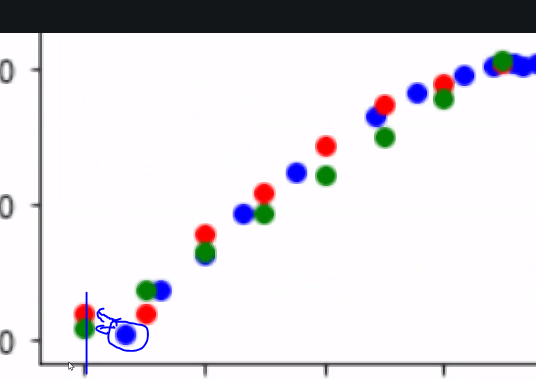

- 관측된 애들에서 크거나 작은 애들은 같은 답이 나오게됨...
- 관측된 값의 크게 벗어나면 걍 메롱이 되버린다.

In [35]:
max(x_train)

array([44.])

In [39]:
max(y_train)

1100.0

In [38]:
knr.predict([[50]])

array([970.])

In [40]:
knr.predict([[60]])

array([970.])

# 봐라 무조건 무게를 이 따위로 내놓는다1!!

In [41]:
# 50cm 농어의 이웃 찾기
dist, idx = knr.kneighbors([[50]])

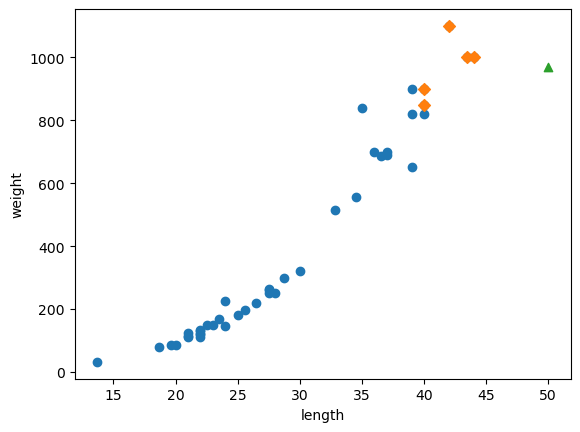

In [44]:
# 산점도
plt.figure()

plt.scatter(x_train, y_train)
plt.scatter(x_train[idx], y_train.iloc[idx.flatten()], marker = "D")
plt.scatter(50, 970, marker = "^")

plt.xlabel("length")
plt.ylabel("weight")

plt.show()

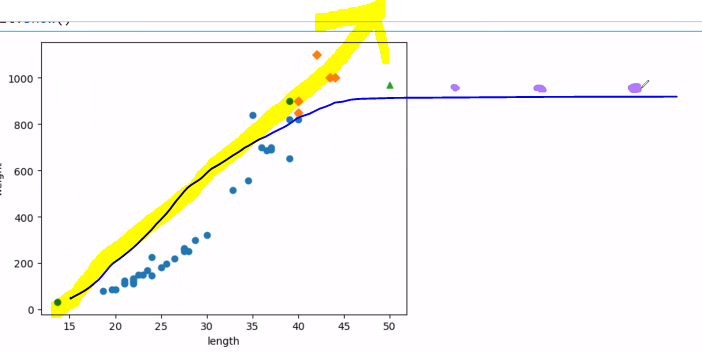

- KNN 을 쓰기 어려운 이유를 시각화해서 보여줌
- 관측값이 없으면 knn 녀석은 예측을 안함 ㅇㅇ